### Topics Covered:
- Descriptive statistics 
- Correlations
- Investigate null values
- Create dummy variables 


In [159]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from scipy.stats import skew

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

%matplotlib inline

In [160]:
df = pd.read_csv('../05-flexible-session/datasets/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [161]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [162]:
df.drop('Id', axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
# look at first column
# according to the data dictionary, the MSSubClass is a categorical variable that describes dwelling types
df['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [24]:
# convert to strings
df['MSSubClass'] = df['MSSubClass'].astype(str)
# or as category ---> df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MSSubClass'].describe()

count     1460
unique      15
top         20
freq       536
Name: MSSubClass, dtype: object

### SalePrice Analysis

In [25]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

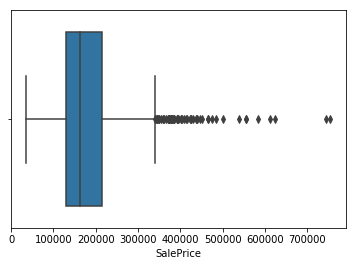

In [28]:
# create a box plot
sns.boxplot(df['SalePrice'])

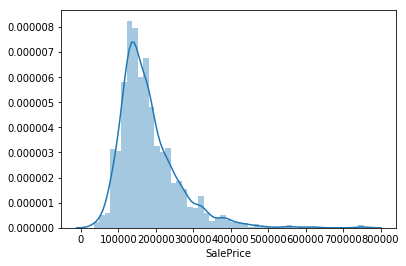

In [29]:
sns.distplot(df['SalePrice'])
#shows positive skew 

In [30]:
print("Skewness: {0:0.3f}".format(df['SalePrice'].skew()))
print("Kurtnosis: {0:0.3f}".format(df['SalePrice'].kurt()))

Skewness: 1.883
Kurtnosis: 6.536


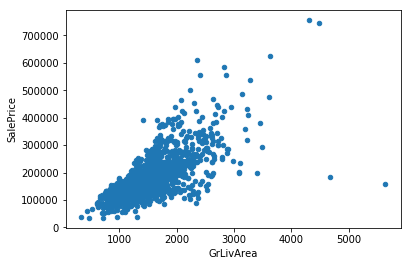

In [32]:
df.plot.scatter(x='GrLivArea', y='SalePrice')

#size of the house area
#positive relationship, some outliers

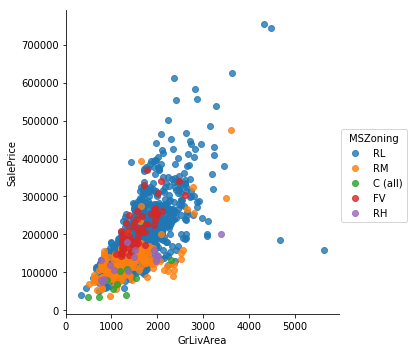

In [33]:
sns.lmplot(x='GrLivArea', y='SalePrice', hue='MSZoning', data=df, fit_reg=False)

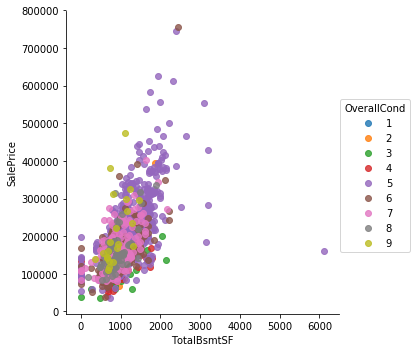

In [34]:
sns.lmplot(x='TotalBsmtSF', y='SalePrice', hue='OverallCond', data=df, fit_reg=False)

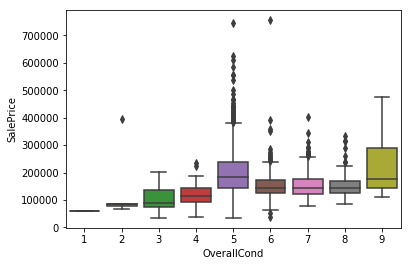

In [36]:
sns.boxplot(data=df, x='OverallCond', y='SalePrice')

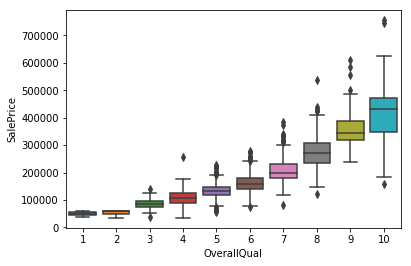

In [41]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')

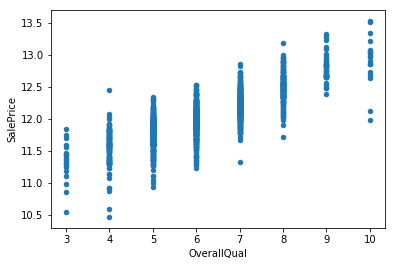

In [87]:
# Selective plotting where OverallQual is greater than 2
df[df['OverallQual'] > 2].plot.scatter(x='OverallQual', y='SalePrice')

In [46]:
df.groupby("OverallQual").mean()['LotArea']

OverallQual
1      7510.000000
2      7840.000000
3      8358.550000
4      8917.982759
5     10153.352645
6     10026.649733
7     11075.799373
8     11103.839286
9     13424.186047
10    19869.944444
Name: LotArea, dtype: float64

AttributeError: 'module' object has no attribute 'xitcks'

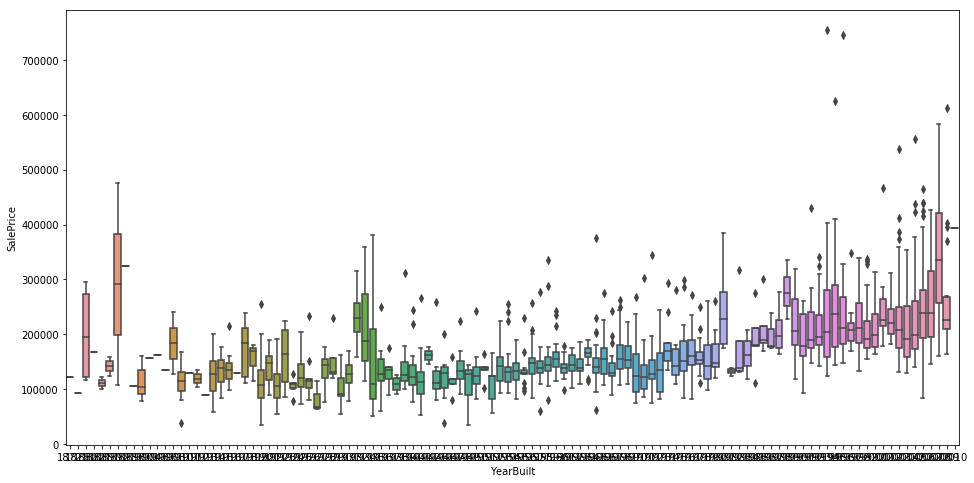

In [45]:
#function returns a tuple with f as 16 and ax as 8
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df, x='YearBuilt', y='SalePrice')
plt.xitcks(rotation=90)

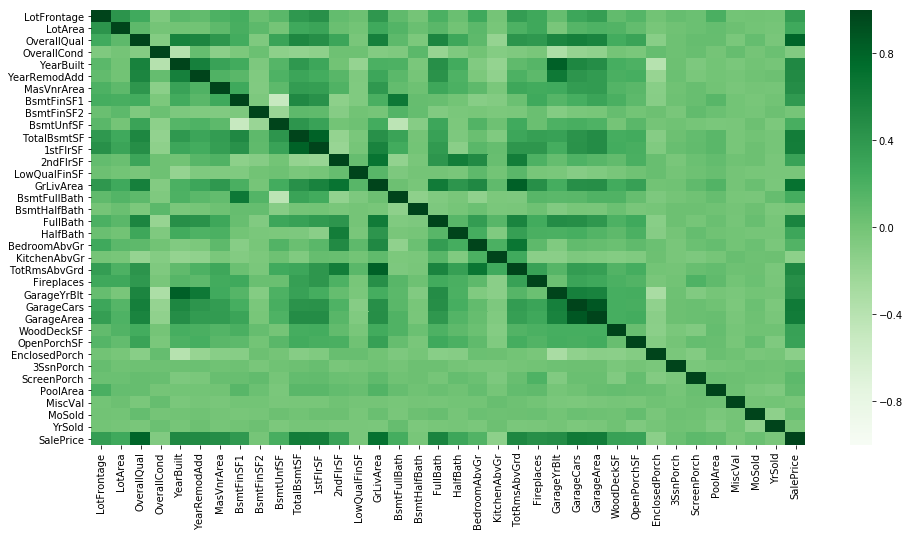

In [51]:
# review correlations 
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cmap="Greens")


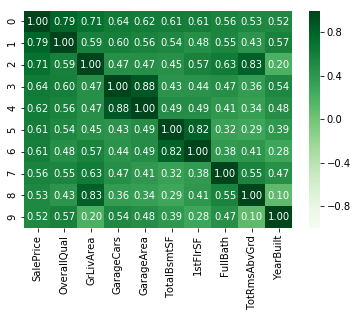

In [59]:
#zoom into the correlation heatmap
n = 10
cols = df.corr().nlargest(n, 'SalePrice')['SalePrice'].index
corr_mat = np.corrcoef(df[cols].values.T)
sns.heatmap(corr_mat, vmin=-1, vmax=+1, annot=True, xticklabels=cols.values, cmap="Greens", fmt=".2f")

In [64]:
corr_df = pd.DataFrame(df.corr())
corr_df.sort_values('SalePrice', ascending=False)

# Once you have the dataframe, scroll all the way to the right to see the SalePrice column to find the correlations values for each feature, 
# sorted by highest correlation features: 'OverallQual', 'GrLivArea', 'GarageCars', etc.

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,0.288886,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,0.250647,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


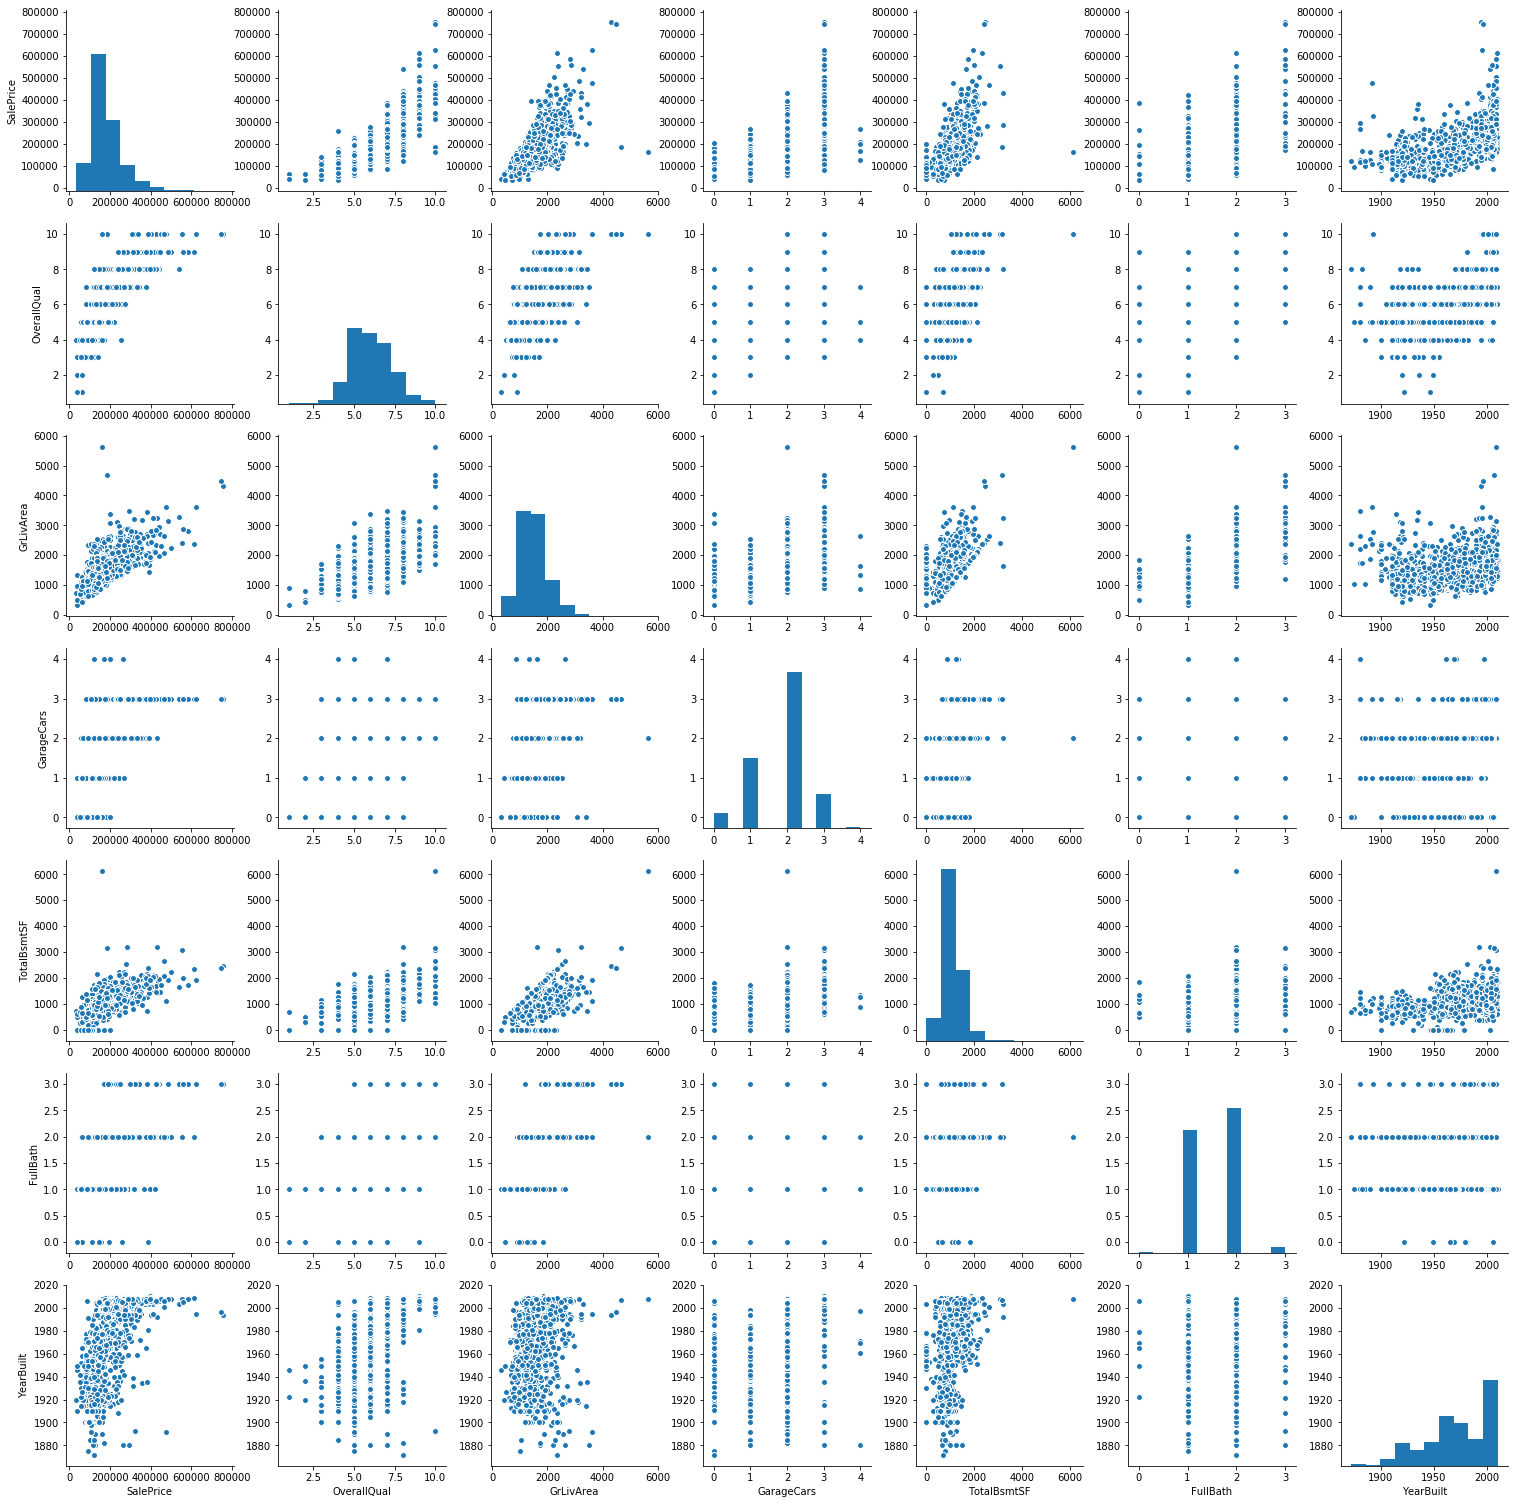

In [68]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 3)

## Transformations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ebf9d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1eae4750>]], dtype=object)

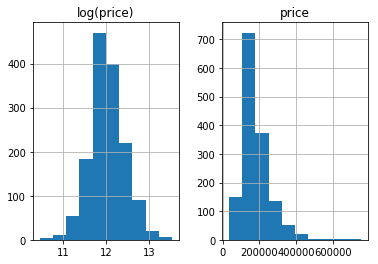

In [136]:
prices = pd.DataFrame({"price":df['SalePrice'], "log(price)": np.log(df['SalePrice'])})
prices.hist()

#### Note: make sure to import scipy.stats (put at the top)

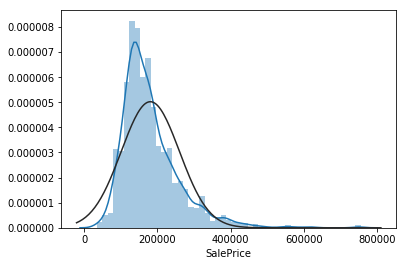

In [137]:
sns.distplot(df['SalePrice'], fit=norm)

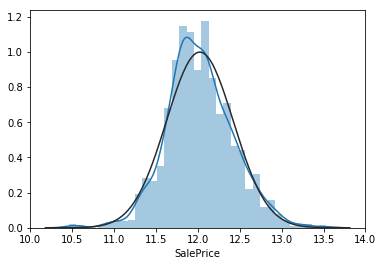

In [77]:
sns.distplot(np.log(df['SalePrice']), fit=norm)

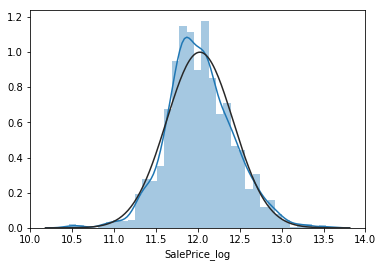

In [158]:
# saving the SalePrice log in df and calling it directly 
# df['SalePrice_log'] = np.log(df['SalePrice'])

sns.distplot(df['SalePrice_log'], fit=norm)

In [163]:
def un_skew_me(dataframe):
    numeric_features = dataframe.dtypes[dataframe.dtypes != "object"].index
    skewed_features = dataframe[numeric_features].apply(lambda x: skew(x.dropna()))
    skewed_features = skewed_features[skewed_features > 0.75]
    #log1p - 1og of 1 plus the variable, just in case there are data points that might be 0
    skewed_features = skewed_features.index
    dataframe[skewed_features]=np.log1p(dataframe[skewed_features])
    return dataframe

df = un_skew_me(df)

### Missing Values

In [164]:
df.isnull().sum

total = df.isnull().sum()
pct_null = (df.isnull().sum() / df.isnull().count())
missing_data = pd.concat([total, pct_null], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20).sort_values(by=['Percent'], ascending=False)
missing_data.sort_values(by=['Percent'], ascending=False)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [140]:
## alternative 

df.isnull().sum

total = df.isnull().sum().sort_values(ascending=False)
pct_null = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, pct_null], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# can use cross validation to see model performance without null values or transforming null values 

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [165]:
# Deal with missing values

df.drop((missing_data[missing_data['Percent'] > 0.15]).index, axis=1, inplace=True)

In [144]:
df.isnull().sum()
#all of these are categorical 

MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
                 ..
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0


In [107]:
### Can see categorical variables above 

## Dummy Variables

In [166]:
df = pd.get_dummies(df, drop_first=True)

In [167]:
#fill missing values with the mean value
# Use fillna()
df = df.fillna(df.mean())

In [168]:
# confirm the lack of NAs - you want 0 
df.isnull().sum().max()

0

## Models

In [169]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [170]:
X.shape
#shows we have 245 features because of all the dummy variables 

(1460, 231)

In [171]:
def get_cv_scores(model):
    """
    Returns the cross-validation RMSE (Root Mean Squared Error)
    so we can quickly evaluate our models
    and pick the best tuning parameters 
    The RMSE = the standard deviation of the residuals (prediction errors)
    """
    #run 5 fold cross validation
    return np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))

In [172]:
get_cv_scores(Ridge())

array([ 0.11252579,  0.13859844,  0.13493587,  0.1141619 ,  0.15515708])

In [173]:
alphas = np.linspace(0.01, 100, 50)
ridge_scores = [get_cv_scores(Ridge(alpha=alpha)).mean() for alpha in alphas]
ridge_scores = pd.Series(ridge_scores, index=alphas)

Text(0,0.5,u'RMSE')

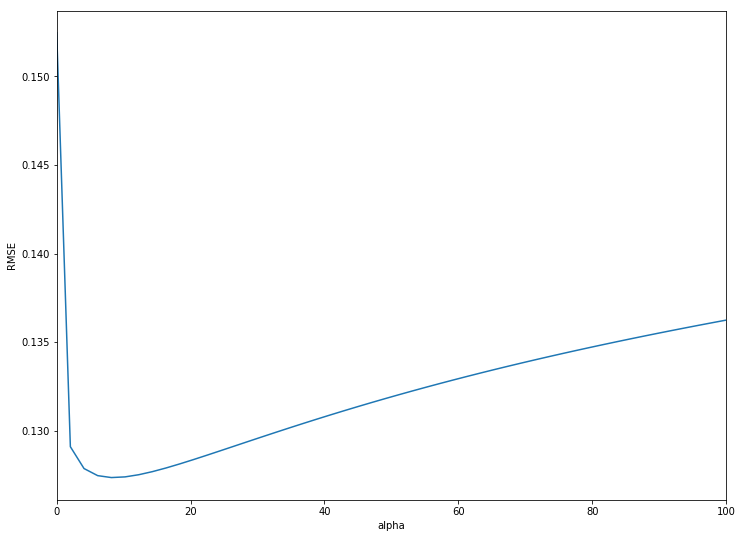

In [174]:
f, ax = plt.subplots(figsize=(12,9))
ridge_scores.plot()
plt.xlabel("alpha")
plt.ylabel("RMSE")

#want the alpha that will give us the minimum RSME

In [179]:
print("Best cross-validation RMSE score for Ridge Regression model was {0:0.5} at alpha parameter = {1:0.5f}".format(ridge_scores.min(), ridge_scores[ridge_scores==ridge_scores.min()].index[0]))

Best cross-validation RMSE score for Ridge Regression model was 0.12736 at alpha parameter = 8.17245
